In [11]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import json
import pandas as pd

In [13]:
# perf_file = "runs/mcmot_profiling/01_mot20_long_run_create_plot_data_cython/result.json"
perf_file = "runs/mcmot_profiling/02_mot20_long_run_box_draw_gl/result.json"


perf_df = pd.read_json(perf_file).sort_values("ts")
perf_df.ts /= 1e6
perf_df.ts -= perf_df.ts[0]

perf_df = perf_df[perf_df.ts > 4]
perf_df.dur /= 1000

funcs_dur_mean = perf_df[["name", "dur"]].groupby(by="name").mean().sort_values("dur", ascending=False)

funcs = list(funcs_dur_mean.index)
funcs = [f for f in funcs if f not in (
    "_mcmot_step (/home/furiosa/Documents/projects/yolov5/utils/mot/mcmot_pipeline.py:118)",
)]

print(len(funcs))
print(funcs)
perf_df
# funcs_dur_mean

29
['update (/home/furiosa/Documents/projects/yolov5/utils/mot/mcmot.py:126)', '__call__ (/home/furiosa/Documents/projects/yolov5/utils/mot/mot_pipeline.py:45)', 'compute_global_track_trajs (/home/furiosa/Documents/projects/yolov5/utils/mot/mcmot.py:241)', '__call__ (/home/furiosa/Documents/projects/yolov5/utils/mot/detector.py:98)', 'match_local_tracks (/home/furiosa/Documents/projects/yolov5/utils/mot/mcmot.py:209)', '__call__ (/home/furiosa/Documents/projects/yolov5/utils/mot/detector_model.py:175)', 'draw_plot (/home/furiosa/Documents/projects/yolov5/utils/mot/mcmot_app_qt.py:52)', '_infer (/home/furiosa/Documents/projects/yolov5/utils/mot/detector_model.py:73)', '__call__ (/home/furiosa/Documents/projects/yolov5/utils/mot/tracker.py:21)', '_read_img (/home/furiosa/Documents/projects/yolov5/utils/mot/mot_pipeline.py:24)', 'set_data (/home/furiosa/Documents/projects/yolov5/utils/ui/mot_view_widget.py:75)', '_add_det (/home/furiosa/Documents/projects/yolov5/utils/mot/mcmot_pipeline.p

,pid,args,ph,name,ts,dur,cat,tid
61301,369199,{'name': 'MOT2'},X,__call__ (/home/furiosa/Documents/projects/yol...,4.000880,14.85225,FEE,0
61288,369199,{'name': 'MOT2'},X,_read_img (/home/furiosa/Documents/projects/yo...,4.000883,1.65050,FEE,0
75301,369082,{'name': 'MOT1'},X,__call__ (/home/furiosa/Documents/projects/yol...,4.000914,21.11625,FEE,0
75288,369082,{'name': 'MOT1'},X,_read_img (/home/furiosa/Documents/projects/yo...,4.000916,1.60600,FEE,0
91301,369081,{'name': 'MOT0'},X,__call__ (/home/furiosa/Documents/projects/yol...,4.000987,21.77900,FEE,0
...,...,...,...,...,...,...,...,...
43995,368774,{'name': 'Main'},X,set_data (/home/furiosa/Documents/projects/yol...,50.359986,0.53550,FEE,1
43996,368774,{'name': 'Main'},X,set_data (/home/furiosa/Documents/projects/yol...,50.360554,0.04325,FEE,1
43997,368774,{'name': 'Main'},X,set_data (/home/furiosa/Documents/projects/yol...,50.360626,0.53450,FEE,1
43998,368774,{'name': 'Main'},X,set_data (/home/furiosa/Documents/projects/yol...,50.361191,0.04300,FEE,1


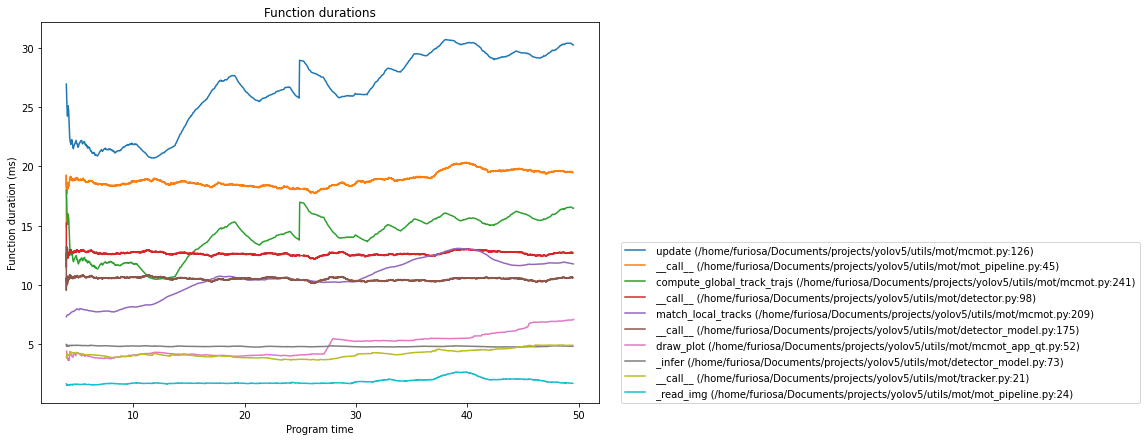

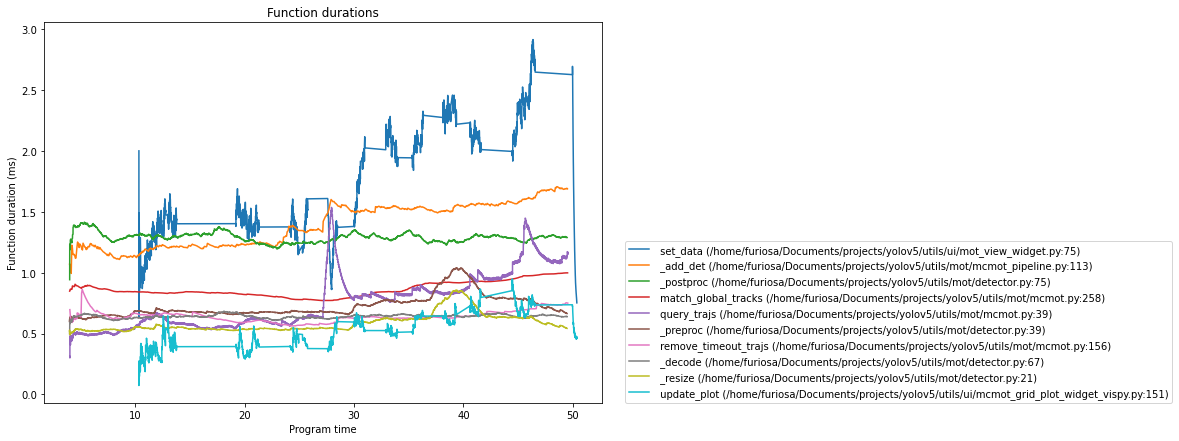

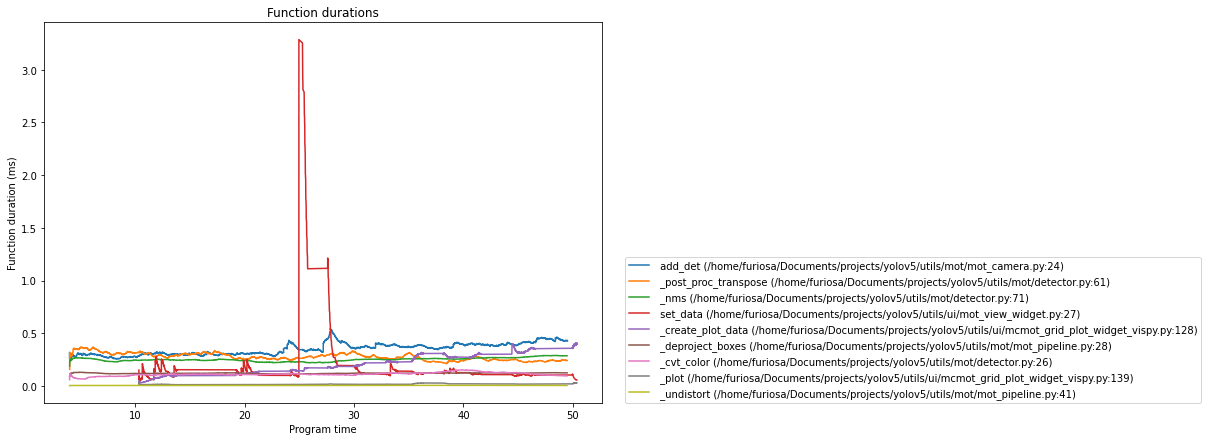

In [14]:
def plot_func_dur(func_ind, smooth=0.99):
    plt.figure(figsize=(10,7)) 

    for func_idx in func_ind:
        func = funcs[func_idx]
        func_data = perf_df[perf_df.name == func]
        x = func_data.ts
        y = func_data.dur

        if smooth is not None:
            y = y.ewm(alpha=(1 - smooth)).mean()

        plt.plot(x, y, label=f" {func}")
        # break

    plt.legend(loc=(1.04,0))
    plt.title("Function durations")
    plt.xlabel("Program time")
    plt.ylabel("Function duration (ms)")

funcs_per_plot = 10
for i in range(0, len(funcs), funcs_per_plot):
    plot_func_dur(range(i, min(i+funcs_per_plot, len(funcs))))